In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!pip install xgboost

# **Import File**


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
data=pd.read_csv('DF3.csv')
data.head(10)

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
5,56669,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1
6,53882,Male,74.0,1,1,Yes,Private,Rural,70.09,27.4,never smoked,1
7,10434,Female,69.0,0,0,No,Private,Urban,94.39,22.8,never smoked,1
8,27419,Female,59.0,0,0,Yes,Private,Rural,76.15,NaN,Unknown,1
9,60491,Female,78.0,0,0,Yes,Private,Urban,58.57,24.2,Unknown,1


**This healthcare dataset contains patient information, including whether they have experienced a stroke.**

# **Data Preprossing**

## Remove `Null` Values

In [5]:
data.isnull().sum()

,0
id,0
gender,0
age,0
hypertension,0
heart_disease,0
ever_married,0
work_type,0
Residence_type,0
avg_glucose_level,0
bmi,201


Although only the **'bmi'** column contains missing values, the significant number of these values could potentially impact the results of the analysis.

In [ ]:
data.shape

(5110, 12)

We used `SimpleImputer` to handle missing values in the 'bmi' column.

> The strategy 'mean' was employed to replace missing values with the average value of the column.



In [ ]:
from sklearn.impute import SimpleImputer
si=SimpleImputer(missing_values=np.nan,strategy='mean')
data['bmi']=si.fit_transform(data[['bmi']])

In [ ]:
data.isnull().sum()

,0
id,0
gender,0
age,0
hypertension,0
heart_disease,0
ever_married,0
work_type,0
Residence_type,0
avg_glucose_level,0
bmi,0


## Encoding

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                5110 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [ ]:
obj_columns=data.select_dtypes(include=['object']).columns
obj_columns

Index(['gender', 'ever_married', 'work_type', 'Residence_type',
       'smoking_status'],
      dtype='object')

We applied Label Encoding to transform categorical features into numerical representations.

In [ ]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
for col in obj_columns:
  data[col]=le.fit_transform(data[col])

data.head(10)

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,1,67.0,0,1,1,2,1,228.69,36.600000,1,1
1,51676,0,61.0,0,0,1,3,0,202.21,28.893237,2,1
2,31112,1,80.0,0,1,1,2,0,105.92,32.500000,2,1
3,60182,0,49.0,0,0,1,2,1,171.23,34.400000,3,1
4,1665,0,79.0,1,0,1,3,0,174.12,24.000000,2,1
5,56669,1,81.0,0,0,1,2,1,186.21,29.000000,1,1
6,53882,1,74.0,1,1,1,2,0,70.09,27.400000,2,1
7,10434,0,69.0,0,0,0,2,1,94.39,22.800000,2,1
8,27419,0,59.0,0,0,1,2,0,76.15,28.893237,0,1
9,60491,0,78.0,0,0,1,2,1,58.57,24.200000,0,1


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   int64  
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   int64  
 6   work_type          5110 non-null   int64  
 7   Residence_type     5110 non-null   int64  
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                5110 non-null   float64
 10  smoking_status     5110 non-null   int64  
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(9)
memory usage: 479.2 KB


In [ ]:
for i in obj_columns:
  print(i,data[i].unique())

gender [1 0 2]
ever_married [1 0]
work_type [2 3 0 4 1]
Residence_type [1 0]
smoking_status [1 2 3 0]


## Drop UnImportent Features and Checks Relation Between Features

In [ ]:
data.drop(['id'],axis=1,inplace=True)

In [ ]:
data.corr()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
gender,1.000000,-0.028202,0.020994,0.085447,-0.031005,0.056422,-0.006738,0.055180,-0.026109,-0.062581,0.008929
age,-0.028202,1.000000,0.276398,0.263796,0.679125,-0.361642,0.014180,0.238171,0.325942,0.265199,0.245257
hypertension,0.020994,0.276398,1.000000,0.108306,0.164243,-0.051761,-0.007913,0.174474,0.160189,0.111038,0.127904
heart_disease,0.085447,0.263796,0.108306,1.000000,0.114644,-0.028023,0.003092,0.161857,0.038899,0.048460,0.134914
ever_married,-0.031005,0.679125,0.164243,0.114644,1.000000,-0.352722,0.006261,0.155068,0.335705,0.259647,0.108340
work_type,0.056422,-0.361642,-0.051761,-0.028023,-0.352722,1.000000,-0.007316,-0.050513,-0.299448,-0.305927,-0.032316
Residence_type,-0.006738,0.014180,-0.007913,0.003092,0.006261,-0.007316,1.000000,-0.004946,-0.000120,0.008237,0.015458
avg_glucose_level,0.055180,0.238171,0.174474,0.161857,0.155068,-0.050513,-0.004946,1.000000,0.168751,0.063437,0.131945
bmi,-0.026109,0.325942,0.160189,0.038899,0.335705,-0.299448,-0.000120,0.168751,1.000000,0.219148,0.038947
smoking_status,-0.062581,0.265199,0.111038,0.048460,0.259647,-0.305927,0.008237,0.063437,0.219148,1.000000,0.028123


In [ ]:
data.corrwith(data['stroke'])

,0
gender,0.008929
age,0.245257
hypertension,0.127904
heart_disease,0.134914
ever_married,0.108340
work_type,-0.032316
Residence_type,0.015458
avg_glucose_level,0.131945
bmi,0.038947
smoking_status,0.028123


In [ ]:
data.shape

(5110, 11)

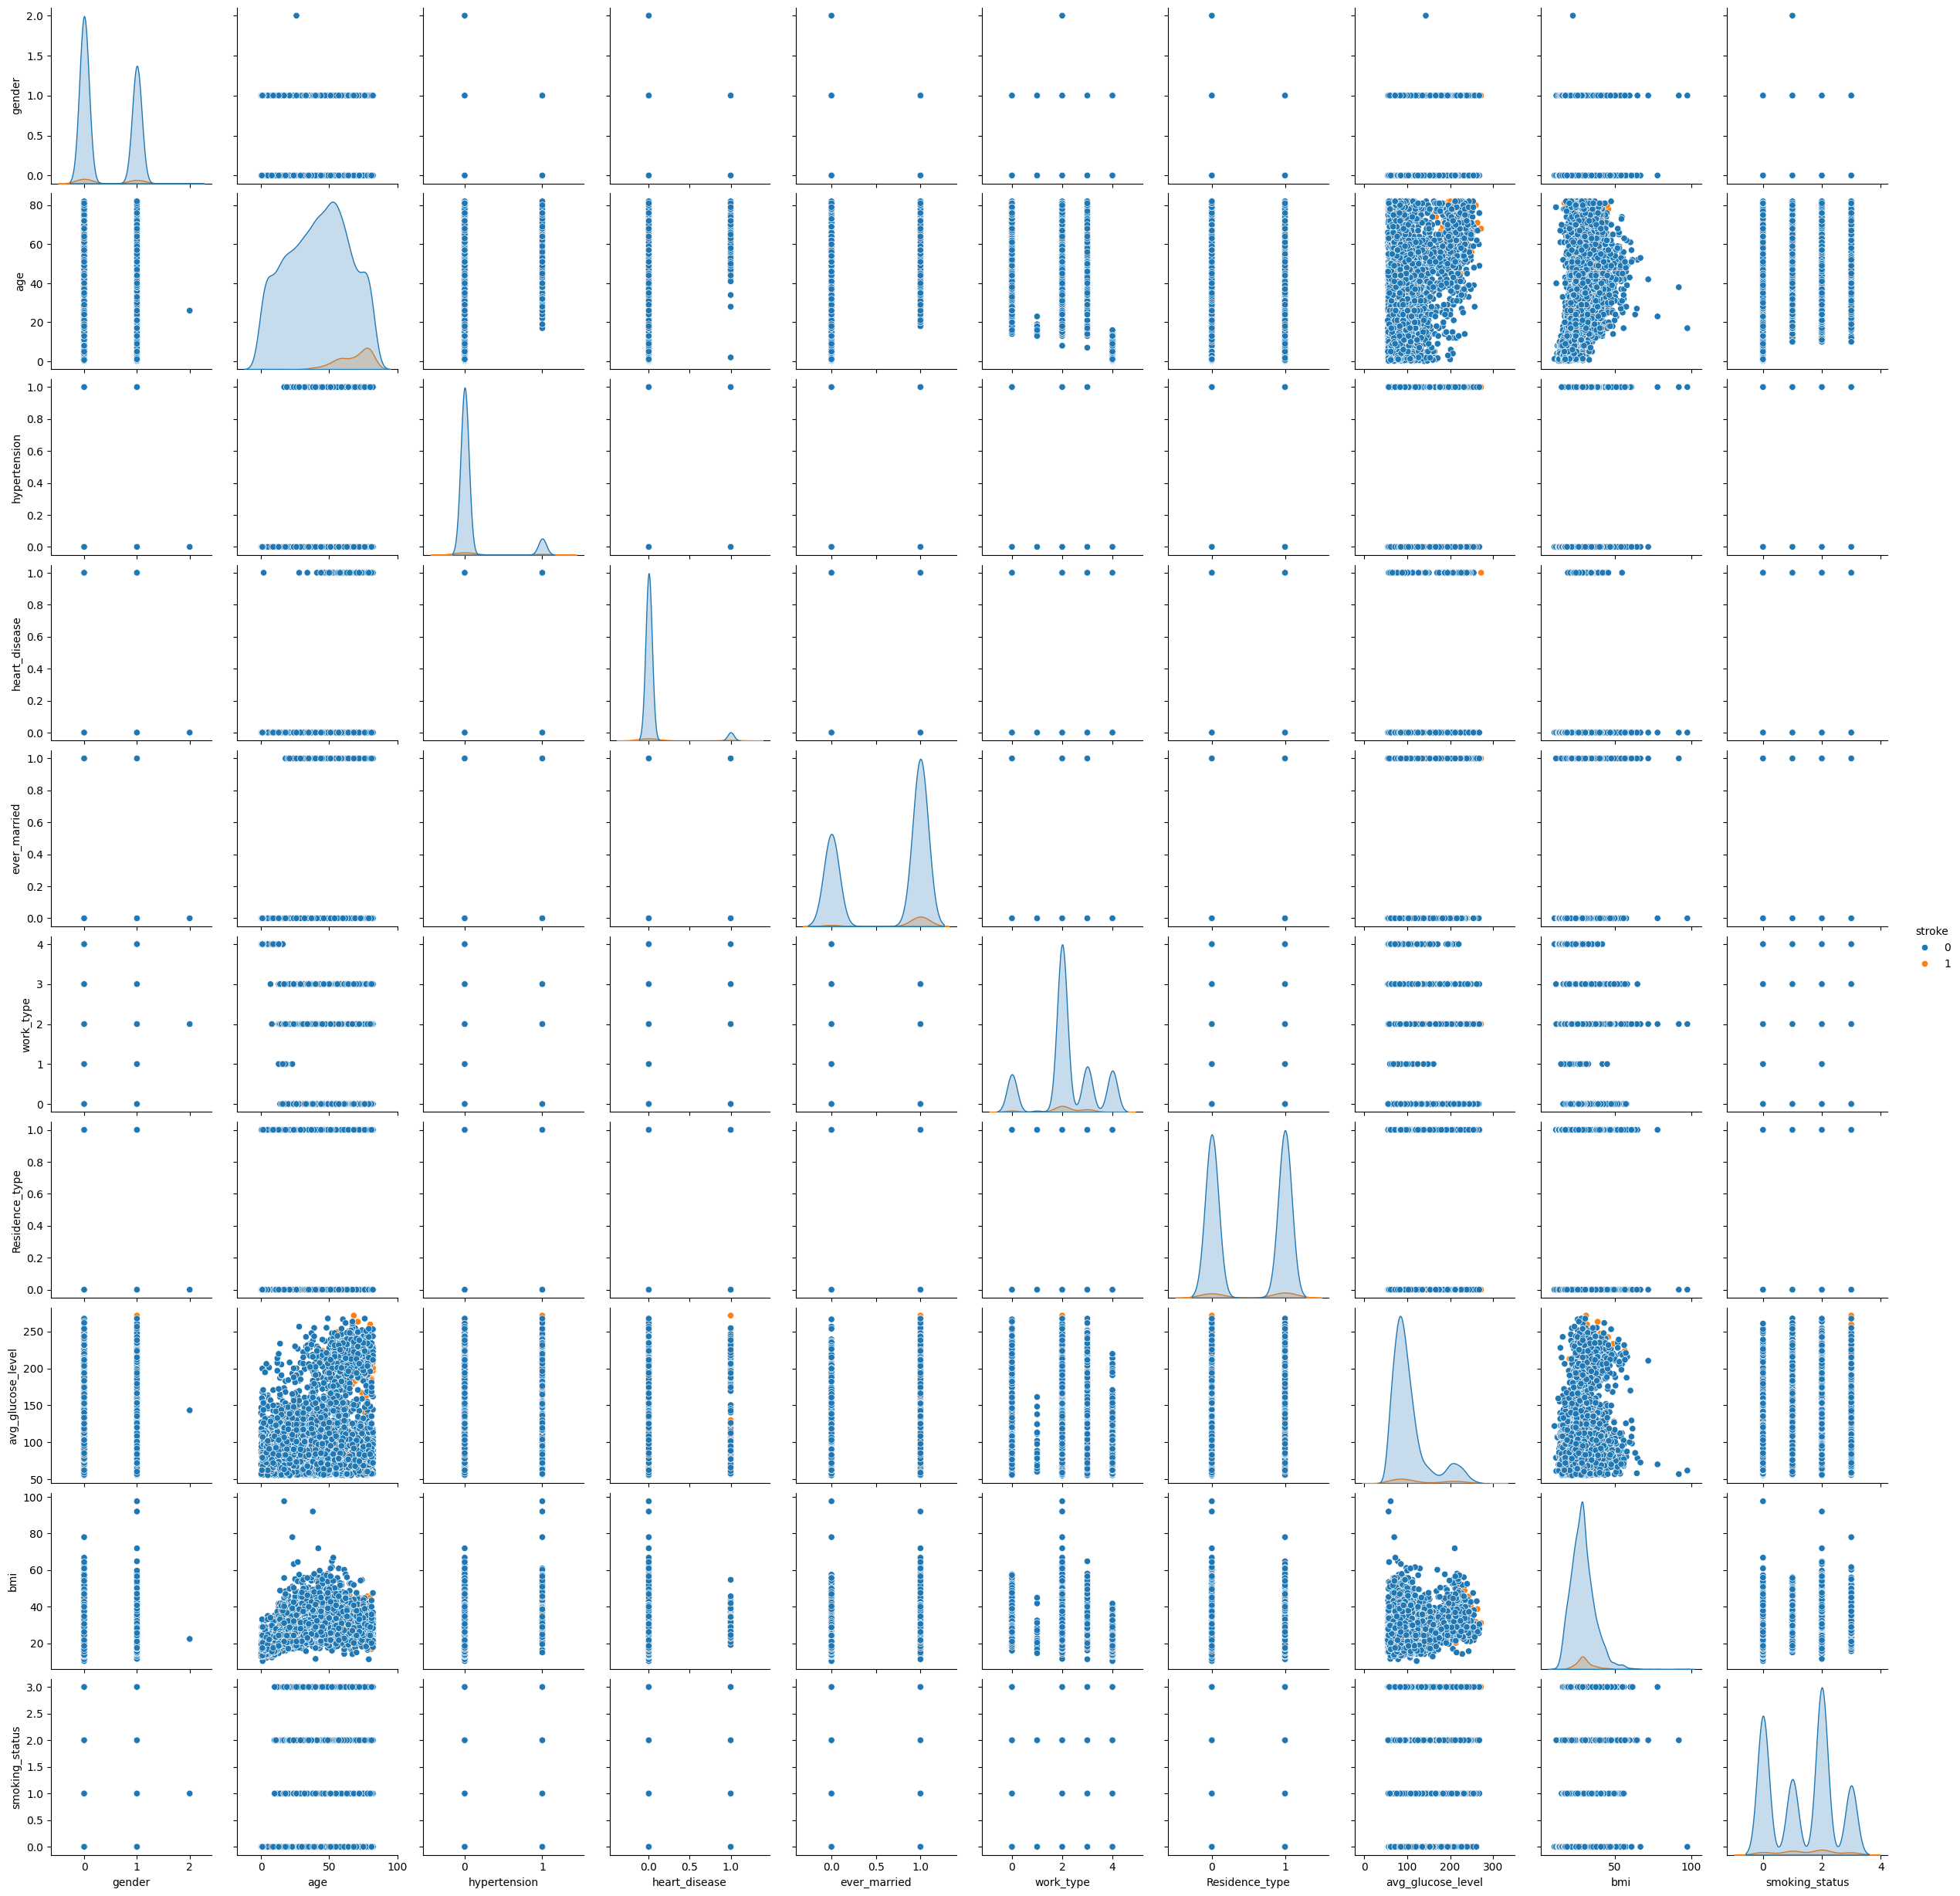

In [ ]:
sns.pairplot(data,hue='stroke')
plt.show()

## Remove Outliers

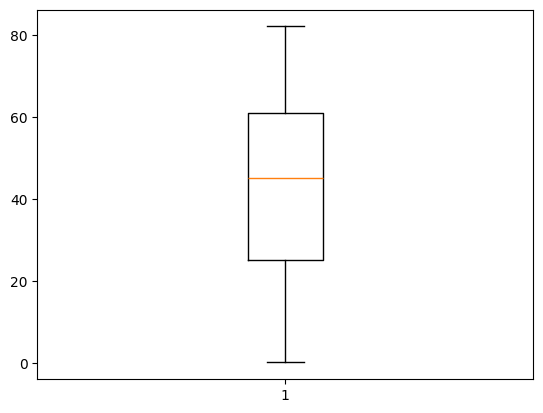

In [ ]:
plt.boxplot(data['age'])
plt.show()

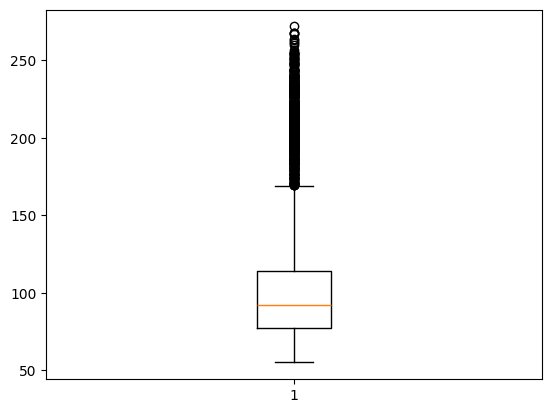

In [ ]:
plt.boxplot(data['avg_glucose_level'])
plt.show()

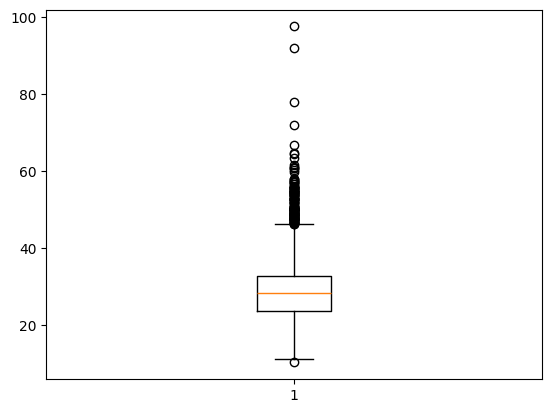

In [ ]:
plt.boxplot(data['bmi'])
plt.show()

The columns 'avg_glucose_level' and 'bmi' contain a significant number of outliers, which can negatively impact the performance of machine learning models. To mitigate this, we will employ the Interquartile Range (IQR) method to identify and handle these outliers.

In [ ]:
def remove_outlier(x,low,high):
  if x > high:
    return high
  elif x < low:
    return low
  else:
    return x

In [ ]:
def IQR(col):
  for i in col:
    q1=data[i].quantile(0.25)
    q3=data[i].quantile(0.75)
    iqr=q3-q1
    lower_bound=q1-1.5*iqr
    upper_bound=q3+1.5*iqr
    data[i]=data[i].apply(remove_outlier,args=(lower_bound,upper_bound))


In [ ]:
IQR(['avg_glucose_level','bmi'])

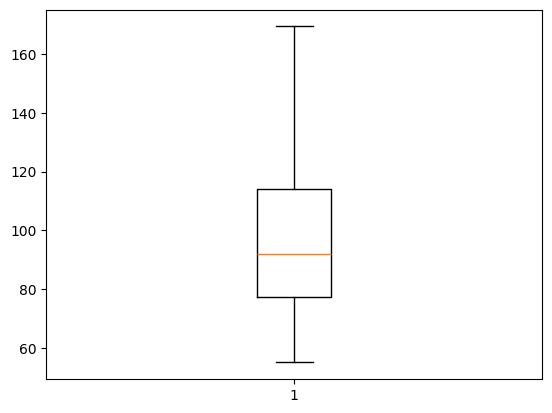

In [ ]:
plt.boxplot(data['avg_glucose_level'])
plt.show()

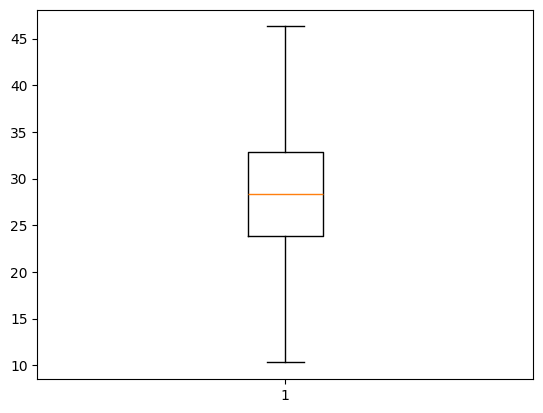

In [ ]:
plt.boxplot(data['bmi'])
plt.show()

## Handeling Imblansed Dataset

In [ ]:
data['stroke'].value_counts()

,count
stroke,
0,4861
1,249


The dataset is highly imbalanced, which could lead to the model overfitting to the majority class (0) and poorly predicting the minority class.

We used `SMOTE` to address the class imbalance in the dataset.

In [ ]:
from imblearn.over_sampling import RandomOverSampler
smote=RandomOverSampler()

In [ ]:
im_x=data.drop(['stroke'],axis=1)
im_y=data['stroke']

In [ ]:
x,y=smote.fit_resample(im_x,im_y)

In [ ]:
y.value_counts()

,count
stroke,
1,4861
0,4861


In [ ]:
x.corrwith(y)

,0
gender,0.028060
age,0.571691
hypertension,0.232033
heart_disease,0.233634
ever_married,0.280359
work_type,-0.086941
Residence_type,0.022643
avg_glucose_level,0.238868
bmi,0.120954
smoking_status,0.072604


## Feature Scaling

In [ ]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x=sc.fit_transform(x.select_dtypes(include=['float64']))

## Train-Test Splitting

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=1)

# Models

## Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier()
dt.fit(x_train,y_train)

DecisionTreeClassifier()

In [ ]:
dt.score(x_test,y_test)

0.9691516709511568

In [ ]:
dt.tree_.max_depth

29

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
df={'max_depth':[i for i in range(1,dt.tree_.max_depth+1)],
    'criterion':['gini','entropy'],
    'splitter':['best','random'],
    'class_weight':[None,'balanced']}

In [ ]:
gd=GridSearchCV(DecisionTreeClassifier(),df,cv=5)
gd.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'class_weight': [None, 'balanced'],
                         'criterion': ['gini', 'entropy'],
                         'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                       13, 14, 15, 16, 17, 18, 19, 20, 21, 22,
                                       23, 24, 25, 26, 27, 28, 29],
                         'splitter': ['best', 'random']})

In [ ]:
gd.best_params_

{'class_weight': None,
 'criterion': 'gini',
 'max_depth': 27,
 'splitter': 'best'}

In [ ]:
dt2=DecisionTreeClassifier(criterion='gini',max_depth=27,splitter='best',class_weight=None)
dt2.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=27)

In [ ]:
dt2.score(x_test,y_test)

0.9696658097686375

              precision    recall  f1-score   support

           0       1.00      0.94      0.97       964
           1       0.94      1.00      0.97       981

    accuracy                           0.97      1945
   macro avg       0.97      0.97      0.97      1945
weighted avg       0.97      0.97      0.97      1945



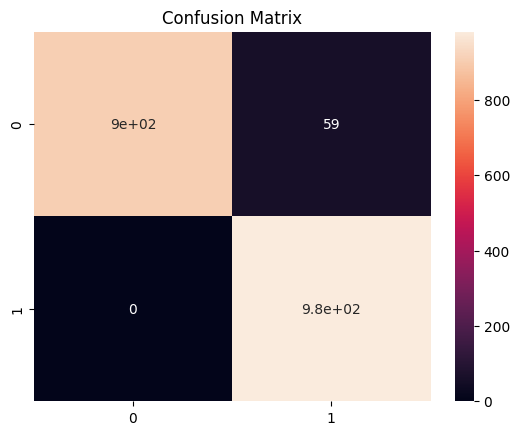

In [ ]:
from sklearn.metrics import confusion_matrix,classification_report
import matplotlib.pyplot as plt

y_pred=dt2.predict(x_test)
print(classification_report(y_test,y_pred))


sns.heatmap(confusion_matrix(y_test,y_pred),annot=True)
plt.title('Confusion Matrix')
plt.show()

              precision    recall  f1-score   support

           0       1.00      0.94      0.97       964
           1       0.94      1.00      0.97       981

    accuracy                           0.97      1945
   macro avg       0.97      0.97      0.97      1945
weighted avg       0.97      0.97      0.97      1945



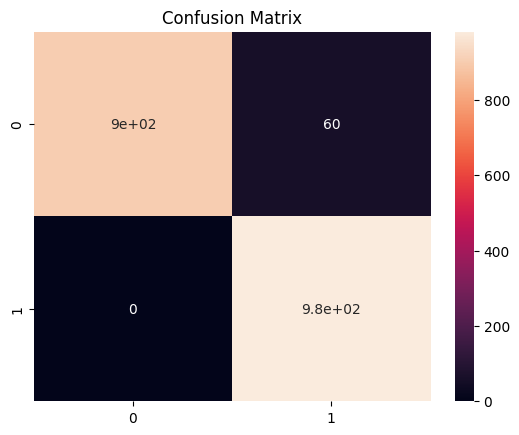

In [ ]:
from sklearn.metrics import confusion_matrix,classification_report
import matplotlib.pyplot as plt

y_pred=dt.predict(x_test)
print(classification_report(y_test,y_pred))


sns.heatmap(confusion_matrix(y_test,y_pred),annot=True)
plt.title('Confusion Matrix')
plt.show()

## RandomForest

In [ ]:
df1={'n_estimators':[i for i in range(50,100)],
     'criterion':['gini','entropy'],
     'max_depth':[i for i in range(1,dt.tree_.max_depth+1)],
     'class_weight':['None','balanced','balanced_subsample']}

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier(n_estimators=550,criterion='gini',max_depth=30,class_weight='balanced_subsample',verbose=1)
rf.fit(x_train,y_train)

[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.4s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    1.7s
[Parallel(n_jobs=1)]: Done 449 tasks      | elapsed:    4.8s


RandomForestClassifier(class_weight='balanced_subsample', max_depth=30,
                       n_estimators=550, verbose=1)

In [ ]:
rf.score(x_test,y_test)

[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done 449 tasks      | elapsed:    0.2s


0.9845758354755784

[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done 449 tasks      | elapsed:    0.2s


              precision    recall  f1-score   support

           0       1.00      0.97      0.98       964
           1       0.97      1.00      0.98       981

    accuracy                           0.98      1945
   macro avg       0.99      0.98      0.98      1945
weighted avg       0.99      0.98      0.98      1945



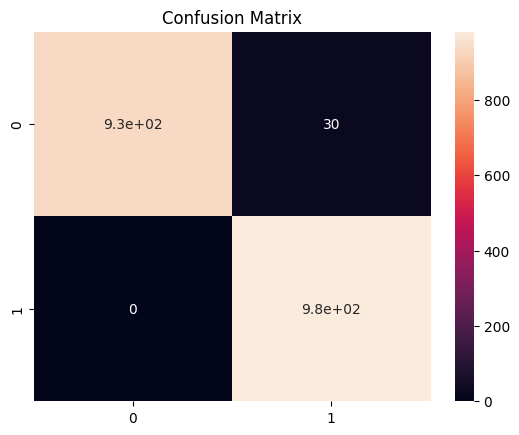

In [ ]:
from sklearn.metrics import confusion_matrix,classification_report
import matplotlib.pyplot as plt

y_pred=rf.predict(x_test)
print(classification_report(y_test,y_pred))


sns.heatmap(confusion_matrix(y_test,y_pred),annot=True)
plt.title('Confusion Matrix')
plt.show()

## K-NEAREST NEIGHBOR

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
df2={'n_neighbors':[i for i in range(1,100)],
     'p':[1,2],
     'weights':['uniform','distance']}

In [ ]:
from sklearn.model_selection import GridSearchCV
gd2=GridSearchCV(KNeighborsClassifier(),df2,cv=5)
gd2.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                         13, 14, 15, 16, 17, 18, 19, 20, 21, 22,
                                         23, 24, 25, 26, 27, 28, 29, 30, ...],
                         'p': [1, 2], 'weights': ['uniform', 'distance']})

In [ ]:
gd2.best_params_

{'n_neighbors': 1, 'p': 1, 'weights': 'uniform'}

In [ ]:
knn=KNeighborsClassifier(n_neighbors=1,p=1,weights='uniform')
knn.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=1, p=1)

In [ ]:
knn.score(x_test,y_test)

0.9696658097686375

              precision    recall  f1-score   support

           0       1.00      0.94      0.97       964
           1       0.94      1.00      0.97       981

    accuracy                           0.97      1945
   macro avg       0.97      0.97      0.97      1945
weighted avg       0.97      0.97      0.97      1945



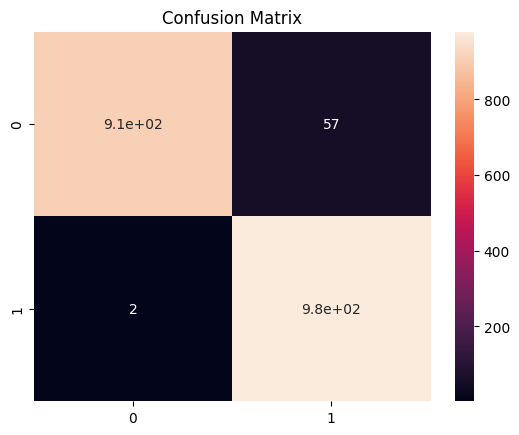

In [ ]:
from sklearn.metrics import confusion_matrix,classification_report
import matplotlib.pyplot as plt

y_pred=knn.predict(x_test)
print(classification_report(y_test,y_pred))


sns.heatmap(confusion_matrix(y_test,y_pred),annot=True)
plt.title('Confusion Matrix')
plt.show()

## NAIVE BAYES

### Gaussian Naive Bayes

In [ ]:
from sklearn.naive_bayes import GaussianNB
gnb=GaussianNB()
gnb.fit(x_train,y_train)

GaussianNB()

In [ ]:
gnb.score(x_test,y_test)

0.757840616966581

              precision    recall  f1-score   support

           0       0.81      0.66      0.73       964
           1       0.72      0.85      0.78       981

    accuracy                           0.76      1945
   macro avg       0.77      0.76      0.76      1945
weighted avg       0.77      0.76      0.76      1945



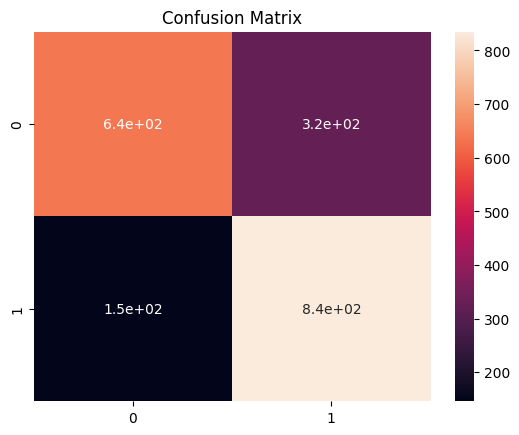

In [ ]:
from sklearn.metrics import confusion_matrix,classification_report
import matplotlib.pyplot as plt

y_pred=gnb.predict(x_test)
print(classification_report(y_test,y_pred))

sns.heatmap(confusion_matrix(y_test,y_pred),annot=True)
plt.title('Confusion Matrix')
plt.show()


### Bernoulli Naive Bayes

In [ ]:
from sklearn.naive_bayes import BernoulliNB
bnb=BernoulliNB()
bnb.fit(x_train,y_train)

BernoulliNB()

In [ ]:
bnb.score(x_test,y_test)

0.7537275064267352

              precision    recall  f1-score   support

           0       0.80      0.67      0.73       964
           1       0.72      0.84      0.77       981

    accuracy                           0.75      1945
   macro avg       0.76      0.75      0.75      1945
weighted avg       0.76      0.75      0.75      1945



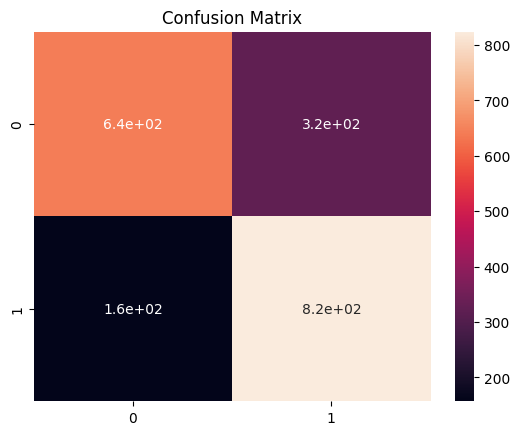

In [ ]:
from sklearn.metrics import confusion_matrix,classification_report
import matplotlib.pyplot as plt

y_pred=bnb.predict(x_test)
print(classification_report(y_test,y_pred))

sns.heatmap(confusion_matrix(y_test,y_pred),annot=True)
plt.title('Confusion Matrix')
plt.show()

### Support Vector Machines

In [ ]:
from sklearn.svm import SVC

In [ ]:
gd3=GridSearchCV(SVC(),{'kernel':['linear','poly','rbf','sigmoid'],
                        'class_weight':['balanced',None],
                        'decision_function_shape':['ovr', 'ovo'],
                        'gamma':['scale','auto']},cv=5)
gd3.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'class_weight': ['balanced', None],
                         'decision_function_shape': ['ovr', 'ovo'],
                         'gamma': ['scale', 'auto'],
                         'kernel': ['linear', 'poly', 'rbf', 'sigmoid']})

In [ ]:
gd3.best_params_

{'class_weight': None,
 'decision_function_shape': 'ovr',
 'gamma': 'scale',
 'kernel': 'rbf'}

In [ ]:
svc=SVC(kernel='rbf',class_weight=None,gamma='scale',decision_function_shape='ovr')
svc.fit(x_train,y_train)

SVC()

In [ ]:
svc.score(x_test,y_test)

0.7624678663239075

              precision    recall  f1-score   support

           0       0.82      0.67      0.74       964
           1       0.72      0.86      0.78       981

    accuracy                           0.76      1945
   macro avg       0.77      0.76      0.76      1945
weighted avg       0.77      0.76      0.76      1945



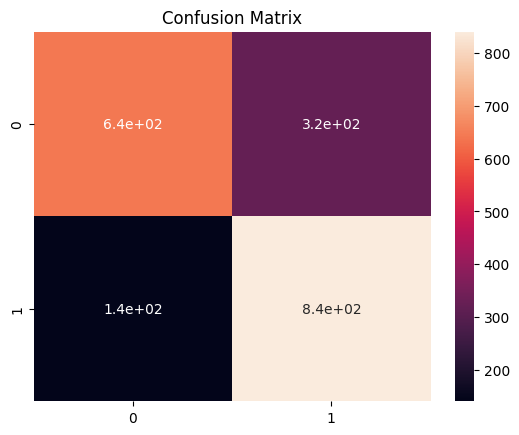

In [ ]:
from sklearn.metrics import confusion_matrix,classification_report
import matplotlib.pyplot as plt

y_pred=svc.predict(x_test)
print(classification_report(y_test,y_pred))

sns.heatmap(confusion_matrix(y_test,y_pred),annot=True)
plt.title('Confusion Matrix')
plt.show()

### Logical Regression

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
gd4=GridSearchCV(LogisticRegression(),{'penalty':['l1','l2','elasticnet','none'],
                                       'solver':['newton-cg', 'lbfgs', 'liblinear','sag','saga'],
                                       'class_weight':[None,'balanced']},cv=5)
gd4.fit(x_train,y_train)

/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py:528: FitFailedWarning: 
130 fits failed out of a total of 200.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
10 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.11/dist-packages/sklearn/base.py", line 1389, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py", line 1193, in fit
    solver = _check_solv

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'class_weight': [None, 'balanced'],
                         'penalty': ['l1', 'l2', 'elasticnet', 'none'],
                         'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag',
                                    'saga']})

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

gd4 = GridSearchCV(LogisticRegression(), {
    'penalty': ['l1', 'l2', 'elasticnet', 'none'],
    'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],
    'class_weight': [None, 'balanced']
}, cv=5)

# Create a dictionary to map penalties to compatible solvers
solver_penalty_map = {
    'l1': ['liblinear', 'saga'],  # l1 penalty works with liblinear and saga
    'l2': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],  # l2 works with all
    'elasticnet': ['saga'],  # elasticnet works with saga
    'none': ['newton-cg', 'lbfgs', 'sag', 'saga']  # none works with these
}

# Filter the parameter grid based on compatible solver-penalty combinations
filtered_param_grid = []
for penalty in gd4.param_grid['penalty']:
    for solver in solver_penalty_map[penalty]:  # Select solvers compatible with the penalty
        for class_weight in gd4.param_grid['class_weight']:
            filtered_param_grid.append({
                'penalty': [penalty],
                'solver': [solver],
                'class_weight': [class_weight]
            })
gd4.param_grid = filtered_param_grid  # Update the param_grid
gd4.fit(x_train, y_train)

/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py:528: FitFailedWarning: 
50 fits failed out of a total of 120.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
10 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.11/dist-packages/sklearn/base.py", line 1389, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py", line 1203, in fit
    raise ValueError("l1_

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid=[{'class_weight': [None], 'penalty': ['l1'],
                          'solver': ['liblinear']},
                         {'class_weight': ['balanced'], 'penalty': ['l1'],
                          'solver': ['liblinear']},
                         {'class_weight': [None], 'penalty': ['l1'],
                          'solver': ['saga']},
                         {'class_weight': ['balanced'], 'penalty': ['l1'],
                          'solver': ['saga']},
                         {'class_weight': [None], 'penalty...
                         {'class_weight': [None], 'penalty': ['none'],
                          'solver': ['lbfgs']},
                         {'class_weight': ['balanced'], 'penalty': ['none'],
                          'solver': ['lbfgs']},
                         {'class_weight': [None], 'penalty': ['none'],
                          'solver': ['sag']},
                         {'class_weight': ['balanced'], 'penalty': ['none'],
                          'solver': ['sag']},
                         {'class_weight': [None], 'penalty': ['none'],
                          'solver': ['saga']},
                         {'class_weight': ['balanced'], 'penalty': ['none'],
                          'solver': ['saga']}])

In [ ]:
gd4.best_params_

{'class_weight': 'balanced', 'penalty': 'l1', 'solver': 'liblinear'}

In [ ]:
lr=LogisticRegression(penalty='l1',class_weight='balanced',solver='liblinear')
lr.fit(x_train,y_train)

LogisticRegression(class_weight='balanced', penalty='l1', solver='liblinear')

In [ ]:
lr.score(x_test,y_test)

0.7604113110539846

              precision    recall  f1-score   support

           0       0.78      0.71      0.75       964
           1       0.74      0.81      0.77       981

    accuracy                           0.76      1945
   macro avg       0.76      0.76      0.76      1945
weighted avg       0.76      0.76      0.76      1945



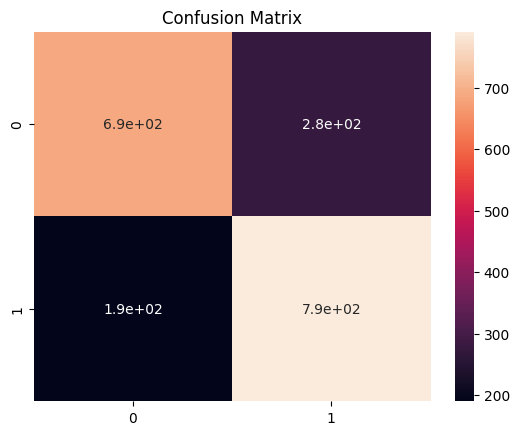

In [ ]:
from sklearn.metrics import confusion_matrix,classification_report
import matplotlib.pyplot as plt

y_pred=lr.predict(x_test)
print(classification_report(y_test,y_pred))

sns.heatmap(confusion_matrix(y_test,y_pred),annot=True)
plt.title('Confusion Matrix')
plt.show()

### Atificial Nural Network

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Input
from tensorflow.keras import regularizers
from tensorflow.keras.optimizers import AdamW

In [ ]:
model=Sequential()
model.add(Input(shape=(x_train.shape[1],)))
model.add(Dense(64,activation='relu'),Dropout(0.3))
model.add(Dense(128,activation='relu'),Dropout(0.4))
model.add(Dense(128,activation='relu'),Dropout(0.4))
model.add(Dense(64,activation='relu'),Dropout(0.3))
model.add(Dense(1,activation='sigmoid'))

In [ ]:
model.compile(optimizer=AdamW(learning_rate=0.001,weight_decay=0.004),loss='binary_crossentropy',metrics=['accuracy'])
model.fit(x_train,y_train,epochs=100,batch_size=10,verbose=1)
loss,accuracy=model.evaluate(x_test,y_test)

Epoch 1/100
778/778 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.7565 - loss: 0.5059
Epoch 2/100
778/778 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7887 - loss: 0.4512
Epoch 3/100
778/778 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.7859 - loss: 0.4431
Epoch 4/100
778/778 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.7844 - loss: 0.4350
Epoch 5/100
778/778 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.7952 - loss: 0.4286
Epoch 6/100
778/778 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8139 - loss: 0.4086
Epoch 7/100
778/778 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8166 - loss: 0.3960
Epoch 8/100
778/778 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8144 - loss: 0.3982
Epoch 9/100
778/778 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8353 - loss: 0.3714
Epoch 10/100
778/778 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.8398 - loss: 0.3644
Epoch 11/100
778/778 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.8443 - loss: 0.3557
Epoch 12/100
778/778 ━━━━━━━━━━━━━━━━━━━━

61/61 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
              precision    recall  f1-score   support

           0       0.97      0.85      0.91       964
           1       0.87      0.97      0.92       981

    accuracy                           0.91      1945
   macro avg       0.92      0.91      0.91      1945
weighted avg       0.92      0.91      0.91      1945



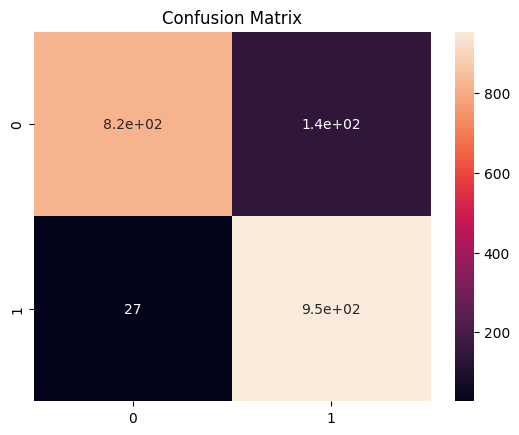

In [ ]:
from sklearn.metrics import confusion_matrix,classification_report
import matplotlib.pyplot as plt

y_pred=model.predict(x_test)
y_pred=(y_pred>0.5)
print(classification_report(y_test,y_pred))

sns.heatmap(confusion_matrix(y_test,y_pred),annot=True)
plt.title('Confusion Matrix')
plt.show()

### XGBoost

In [ ]:
from xgboost import XGBClassifier
from xgboost import  callback

In [ ]:
xgc=XGBClassifier(n_estimators=500,objective='binary:logistic',eval_metric='logloss',early_stopping_rounds=10)
xgc.fit(x_train,y_train,eval_set=[(x_test,y_test)],verbose=1)

[0]	validation_0-logloss:0.56655
[1]	validation_0-logloss:0.49433
[2]	validation_0-logloss:0.44844
[3]	validation_0-logloss:0.41255
[4]	validation_0-logloss:0.38868
[5]	validation_0-logloss:0.36902
[6]	validation_0-logloss:0.34758
[7]	validation_0-logloss:0.33907
[8]	validation_0-logloss:0.33049
[9]	validation_0-logloss:0.32276
[10]	validation_0-logloss:0.31873
[11]	validation_0-logloss:0.31327
[12]	validation_0-logloss:0.30665
[13]	validation_0-logloss:0.30418
[14]	validation_0-logloss:0.29178
[15]	validation_0-logloss:0.28808
[16]	validation_0-logloss:0.28310
[17]	validation_0-logloss:0.27760
[18]	validation_0-logloss:0.27021
[19]	validation_0-logloss:0.26579
[20]	validation_0-logloss:0.26164
[21]	validation_0-logloss:0.25812
[22]	validation_0-logloss:0.25383
[23]	validation_0-logloss:0.25075
[24]	validation_0-logloss:0.24292
[25]	validation_0-logloss:0.24133
[26]	validation_0-logloss:0.23368
[27]	validation_0-logloss:0.22753
[28]	validation_0-logloss:0.22560
[29]	validation_0-loglos

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=10,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=500,
              n_jobs=None, num_parallel_tree=None, random_state=None, ...)

In [ ]:
xgc.score(x_test,y_test)

0.9737789203084833

              precision    recall  f1-score   support

           0       1.00      0.95      0.97       964
           1       0.95      1.00      0.97       981

    accuracy                           0.97      1945
   macro avg       0.98      0.97      0.97      1945
weighted avg       0.98      0.97      0.97      1945



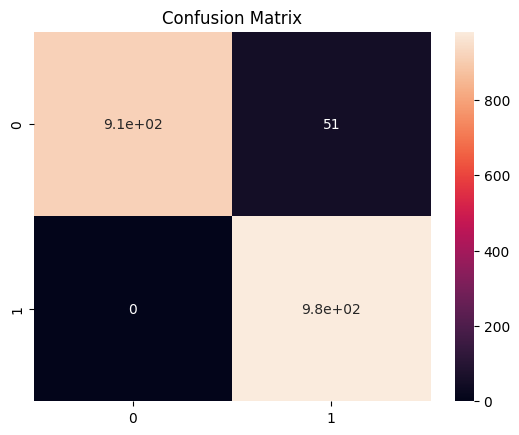

In [ ]:
from sklearn.metrics import confusion_matrix,classification_report
import matplotlib.pyplot as plt

y_pred=xgc.predict(x_test)
print(classification_report(y_test,y_pred))

sns.heatmap(confusion_matrix(y_test,y_pred),annot=True)
plt.title('Confusion Matrix')
plt.show()

### Ensemble

#### Max Voting

In [ ]:
from sklearn.ensemble import VotingClassifier

In [ ]:
li=[('dt',dt2),('rf',rf),('knn',knn),('gnb',gnb),('bnb',bnb),('svc',svc),('lr',lr)]

In [ ]:
vc=VotingClassifier(li,voting='hard',weights=[10,9,8,2,1,3,2])
vc.fit(x_train,y_train)

[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.6s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    2.4s
[Parallel(n_jobs=1)]: Done 449 tasks      | elapsed:    4.5s


VotingClassifier(estimators=[('dt', DecisionTreeClassifier(max_depth=27)),
                             ('rf',
                              RandomForestClassifier(class_weight='balanced_subsample',
                                                     max_depth=30,
                                                     n_estimators=550,
                                                     verbose=1)),
                             ('knn', KNeighborsClassifier(n_neighbors=1, p=1)),
                             ('gnb', GaussianNB()), ('bnb', BernoulliNB()),
                             ('svc', SVC()),
                             ('lr',
                              LogisticRegression(class_weight='balanced',
                                                 penalty='l1',
                                                 solver='liblinear'))],
                 weights=[10, 9, 8, 2, 1, 3, 2])

In [ ]:
vc.score(x_test,y_test)

[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done 449 tasks      | elapsed:    0.2s


0.9727506426735218

[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done 449 tasks      | elapsed:    0.2s


              precision    recall  f1-score   support

           0       1.00      0.95      0.97       964
           1       0.95      1.00      0.97       981

    accuracy                           0.97      1945
   macro avg       0.97      0.97      0.97      1945
weighted avg       0.97      0.97      0.97      1945



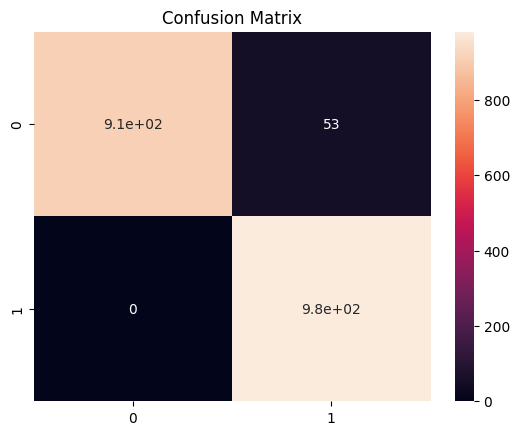

In [ ]:
from sklearn.metrics import confusion_matrix,classification_report
import matplotlib.pyplot as plt

y_pred=vc.predict(x_test)
print(classification_report(y_test,y_pred))

sns.heatmap(confusion_matrix(y_test,y_pred),annot=True)
plt.title('Confusion Matrix')
plt.show()

#### Bagging Meta-Estimator

In [ ]:
from sklearn.ensemble import BaggingClassifier

##### Random Forest

In [ ]:
bg=BaggingClassifier(estimator=rf,n_estimators=100,max_samples=1.0,max_features=1.0)
bg.fit(x_train,y_train)

[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    1.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    4.9s
[Parallel(n_jobs=1)]: Done 449 tasks      | elapsed:   11.1s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.5s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    2.4s
[Parallel(n_jobs=1)]: Done 449 tasks      | elapsed:    5.1s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.5s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    2.1s
[Parallel(n_jobs=1)]: Done 449 tasks      | elapsed:    4.5s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.3s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    1.4s
[Parallel(n_jobs=1)]: Done 449 tasks      | elapsed:    3.1s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.4s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    1.4s
[Parallel(n_jobs=1)]: Done 449 tasks      | elapsed:    3.1s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.4s
[Parallel(n_jobs=1)]: Do

BaggingClassifier(estimator=RandomForestClassifier(class_weight='balanced_subsample',
                                                   max_depth=30,
                                                   n_estimators=550,
                                                   verbose=1),
                  n_estimators=100)

In [ ]:
bg.score(x_test,y_test)

[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done 449 tasks      | elapsed:    0.2s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done 449 tasks      | elapsed:    0.2s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done 449 tasks      | elapsed:    0.2s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done 449 tasks      | elapsed:    0.2s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done 449 tasks      | elapsed:    0.2s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Do

0.974293059125964

[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done 449 tasks      | elapsed:    0.2s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done 449 tasks      | elapsed:    0.2s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done 449 tasks      | elapsed:    0.2s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done 449 tasks      | elapsed:    0.2s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done 449 tasks      | elapsed:    0.2s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Do

              precision    recall  f1-score   support

           0       1.00      0.95      0.97       964
           1       0.95      1.00      0.98       981

    accuracy                           0.97      1945
   macro avg       0.98      0.97      0.97      1945
weighted avg       0.98      0.97      0.97      1945



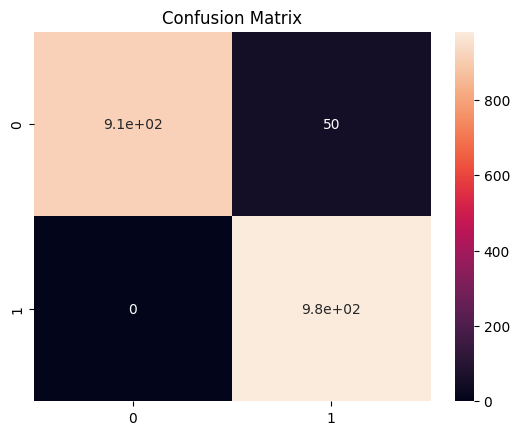

In [ ]:
from sklearn.metrics import confusion_matrix,classification_report
import matplotlib.pyplot as plt

y_pred=bg.predict(x_test)
print(classification_report(y_test,y_pred))

sns.heatmap(confusion_matrix(y_test,y_pred),annot=True)
plt.title('Confusion Matrix')
plt.show()

##### Decision Tree

In [ ]:
bg_dt=BaggingClassifier(estimator=dt2,n_estimators=100,max_samples=1.0,max_features=1.0)
bg_dt.fit(x_train,y_train)

BaggingClassifier(estimator=DecisionTreeClassifier(max_depth=27),
                  n_estimators=100)

In [ ]:
bg_dt.score(x_test,y_test)

0.9763496143958869

              precision    recall  f1-score   support

           0       1.00      0.95      0.98       964
           1       0.96      1.00      0.98       981

    accuracy                           0.98      1945
   macro avg       0.98      0.98      0.98      1945
weighted avg       0.98      0.98      0.98      1945



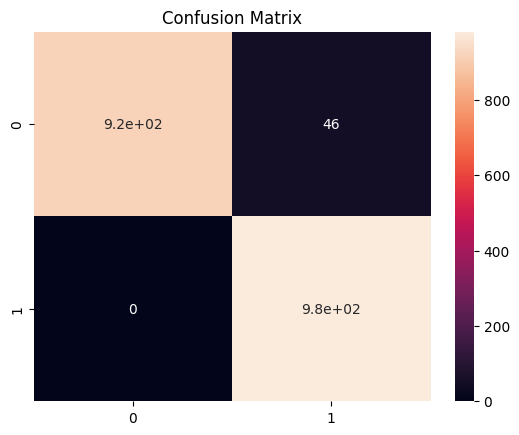

In [ ]:
from sklearn.metrics import confusion_matrix,classification_report
import matplotlib.pyplot as plt

y_pred=bg_dt.predict(x_test)
print(classification_report(y_test,y_pred))

sns.heatmap(confusion_matrix(y_test,y_pred),annot=True)
plt.title('Confusion Matrix')
plt.show()

##### K-Nearest Neighbors

In [ ]:
bg_knn=BaggingClassifier(estimator=knn,n_estimators=100,max_samples=1.0,max_features=1.0)
bg_knn.fit(x_train,y_train)

BaggingClassifier(estimator=KNeighborsClassifier(n_neighbors=1, p=1),
                  n_estimators=100)

In [ ]:
bg_knn.score(x_test,y_test)

0.9696658097686375

              precision    recall  f1-score   support

           0       1.00      0.94      0.97       964
           1       0.94      1.00      0.97       981

    accuracy                           0.97      1945
   macro avg       0.97      0.97      0.97      1945
weighted avg       0.97      0.97      0.97      1945



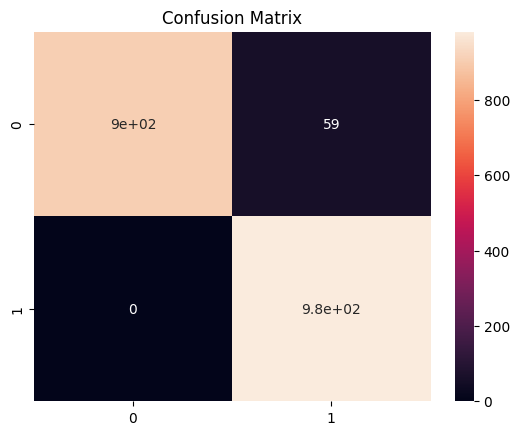

In [ ]:
from sklearn.metrics import confusion_matrix,classification_report
import matplotlib.pyplot as plt

y_pred=bg_knn.predict(x_test)
print(classification_report(y_test,y_pred))

sns.heatmap(confusion_matrix(y_test,y_pred),annot=True)
plt.title('Confusion Matrix')
plt.show()

##### Gaussian Navic Bayes

In [ ]:
bg_gnb=BaggingClassifier(estimator=gnb,n_estimators=100,max_samples=1.0,max_features=1.0)
bg_gnb.fit(x_train,y_train)

BaggingClassifier(estimator=GaussianNB(), n_estimators=100)

In [ ]:
bg_gnb.score(x_test,y_test)

0.7583547557840618

              precision    recall  f1-score   support

           0       0.81      0.66      0.73       964
           1       0.72      0.85      0.78       981

    accuracy                           0.76      1945
   macro avg       0.77      0.76      0.76      1945
weighted avg       0.77      0.76      0.76      1945



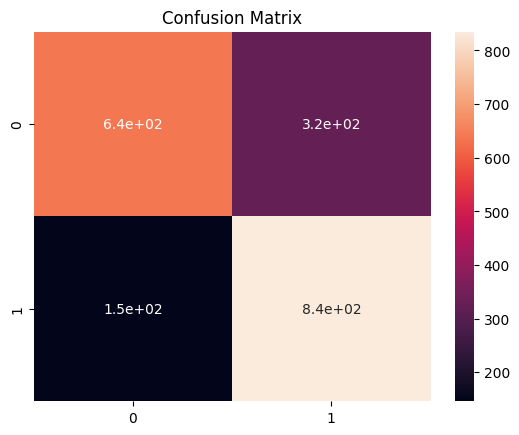

In [ ]:
from sklearn.metrics import confusion_matrix,classification_report
import matplotlib.pyplot as plt

y_pred=bg_gnb.predict(x_test)
print(classification_report(y_test,y_pred))

sns.heatmap(confusion_matrix(y_test,y_pred),annot=True)
plt.title('Confusion Matrix')
plt.show()

##### Bernoulli Navic Bayes

In [ ]:
bg_bnb=BaggingClassifier(estimator=bnb,n_estimators=100,max_samples=1.0,max_features=1.0)
bg_bnb.fit(x_train,y_train)

BaggingClassifier(estimator=BernoulliNB(), n_estimators=100)

In [ ]:
bg_bnb.score(x_test,y_test)

0.7537275064267352

              precision    recall  f1-score   support

           0       0.80      0.67      0.73       964
           1       0.72      0.84      0.77       981

    accuracy                           0.75      1945
   macro avg       0.76      0.75      0.75      1945
weighted avg       0.76      0.75      0.75      1945



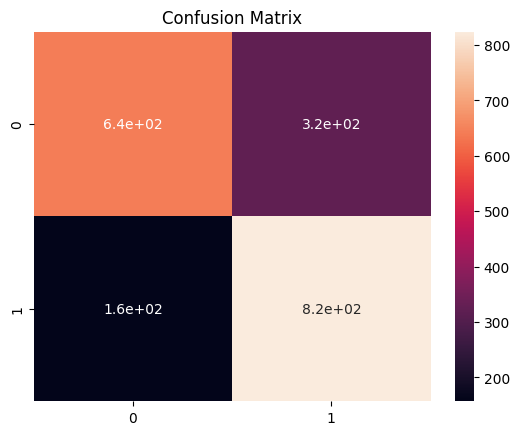

In [ ]:
from sklearn.metrics import confusion_matrix,classification_report
import matplotlib.pyplot as plt

y_pred=bg_bnb.predict(x_test)
print(classification_report(y_test,y_pred))

sns.heatmap(confusion_matrix(y_test,y_pred),annot=True)
plt.title('Confusion Matrix')
plt.show()

##### Support Vactor

In [ ]:
bg_svc=BaggingClassifier(estimator=svc,n_estimators=100,max_samples=1.0,max_features=1.0)
bg_svc.fit(x_train,y_train)

BaggingClassifier(estimator=SVC(), n_estimators=100)

In [ ]:
bg_svc.score(x_test,y_test)

0.7634961439588689

##### Logistic Regression

In [ ]:
bg_lr=BaggingClassifier(estimator=lr,n_estimators=100,max_samples=1.0,max_features=1.0)
bg_lr.fit(x_train,y_train)

BaggingClassifier(estimator=LogisticRegression(class_weight='balanced',
                                               penalty='l1',
                                               solver='liblinear'),
                  n_estimators=100)

In [ ]:
bg_lr.score(x_test,y_test)

0.7598971722365039

# Scorring

In [ ]:
from sklearn.metrics import roc_auc_score,recall_score,precision_score,f1_score,accuracy_score

In [ ]:
def get_score(model):
  scores=[]
  for i in model:
    scores.append(i.score(x_test,y_test))
  return scores

In [ ]:
def get_recall(model):
  scores=[]
  for i in model:
    scores.append(recall_score(y_test,i.predict(x_test)))
  return scores

In [ ]:
def get_precision(model):
  scores=[]
  for i in model:
    scores.append(precision_score(y_test,i.predict(x_test)))
  return scores

In [ ]:
def get_f1_score(model):
  scores=[]
  for i in model:
    scores.append(f1_score(y_test,i.predict(x_test)))
  return scores

In [ ]:
def get_roc(model):
  scores=[]
  for i in model:
    scores.append(roc_auc_score(y_test,i.predict(x_test)))
  return scores

In [ ]:
l=[dt2,rf,knn,gnb,bnb,svc,lr,xgc,vc,bg_dt,bg_knn,bg]

In [ ]:
df={"model":["Decission Tree","Random Forest","K-Nearest Neighbours","Gaussion Naive Bayes","Bernoulli Naive Bayes","Support Vector Matchines","Logistic Regression","XGBoost","Max Voting","Bagging Meta-Estimator(Decission Tree)","Bagging Meta-Estimator(K-Nearest Neighbours)","Bagging Meta-Estimator(Random Forest)","Artificial Neural Network"],
    "Accuracy":get_score(l)+[model.evaluate(x_test,y_test)[1]],
    "f1_score":get_f1_score(l)+[f1_score(y_test,(model.predict(x_test)>0.5).astype('int'))],
    "recall":get_recall(l)+[recall_score(y_test,(model.predict(x_test)>0.5).astype('int'))],
    "precision":get_precision(l)+[precision_score(y_test,(model.predict(x_test)>0.5).astype('int'))],
    "roc":get_roc(l)+[roc_auc_score(y_test,model.predict(x_test))]}

[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done 449 tasks      | elapsed:    0.2s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done 449 tasks      | elapsed:    0.3s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done 449 tasks      | elapsed:    0.2s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done 449 tasks      | elapsed:    0.2s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done 449 tasks      | elapsed:    0.2s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Do

32/61 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8973 - loss: 0.2735 

[Parallel(n_jobs=1)]: Done 449 tasks      | elapsed:    0.2s


61/61 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9038 - loss: 0.2586


[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done 449 tasks      | elapsed:    0.2s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done 449 tasks      | elapsed:    0.2s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done 449 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done 449 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done 449 tasks      | elapsed:    0.2s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Do

61/61 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done 449 tasks      | elapsed:    0.2s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done 449 tasks      | elapsed:    0.2s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done 449 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done 449 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done 449 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Do

61/61 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


[Parallel(n_jobs=1)]: Done 449 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done 449 tasks      | elapsed:    0.2s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done 449 tasks      | elapsed:    0.2s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done 449 tasks      | elapsed:    0.2s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done 449 tasks      | elapsed:    0.2s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done 449 tasks      | elapsed:    0.2s
[Parallel(n_jobs=1)]: Do

61/61 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done 449 tasks      | elapsed:    0.2s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done 449 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done 449 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done 449 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done 449 tasks      | elapsed:    0.2s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Do

61/61 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


In [ ]:
df1=pd.DataFrame(df,index=["dt","rf","knn","gnb","bnb","svc","lr","xgc","vc","bg_dt","bg_knn","bg","ann"])
df1

,model,Accuracy,f1_score,recall,precision,roc
dt,Decission Tree,0.969666,0.970807,1.000000,0.943269,0.969398
rf,Random Forest,0.984576,0.984940,1.000000,0.970326,0.984440
knn,K-Nearest Neighbours,0.969666,0.970749,0.997961,0.944981,0.969416
gnb,Gaussion Naive Bayes,0.757841,0.780009,0.851172,0.719828,0.757018
bnb,Bernoulli Naive Bayes,0.753728,0.774800,0.839959,0.719023,0.752967
svc,Support Vector Matchines,0.762468,0.784515,0.857288,0.723130,0.761632
lr,Logistic Regression,0.760411,0.772461,0.806320,0.741331,0.760007
xgc,XGBoost,0.973779,0.974665,1.000000,0.950581,0.973548
vc,Max Voting,0.972751,0.973697,1.000000,0.948743,0.972510
bg_dt,Bagging Meta-Estimator(Decission Tree),0.976350,0.977092,1.000000,0.955209,0.976141


In [ ]:
from google.colab import sheets
sheet = sheets.InteractiveSheet(df=df1)

https://docs.google.com/spreadsheets/d/1pOZhmW4B3JgNwXzNwcZh-goVSnhm8gjNhXsvSoLxWdE#gid=0


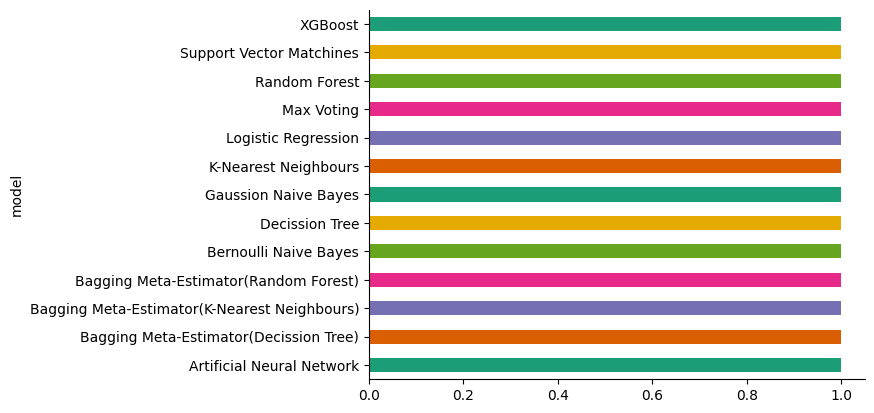

In [ ]:
# @title model

from matplotlib import pyplot as plt
import seaborn as sns
df1.groupby('model').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)